# Unit 5 - Financial Planning


In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
# YOUR CODE HERE!
my_eth = 5.3
my_btc = 1.2

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [5]:
# Fetch current BTC price
# YOUR CODE HERE!
btc_json = requests.get(btc_url).json()
btc_price = btc_json['data']['1']['quotes']['USD']['price']
btc_price
# Fetch current ETH price
# YOUR CODE HERE!]
eth_json = requests.get(eth_url).json()
eth_price = eth_json['data']['1027']['quotes']['USD']['price']
eth_price
# Compute current value of my crpto
# YOUR CODE HERE!
my_btc_value = btc_price * my_btc
my_eth_value = eth_price * my_eth
# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $56601.60
The current value of your 5.3 ETH is $7912.69


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [6]:
# Current amount of shares
# YOUR CODE HERE!

shares_data = {
    "shares": [200, 50]
}

# Set the tickers
tickers = ["AGG", "SPY"]

# Create the shares DataFrame
df_shares = pd.DataFrame(shares_data, index=tickers)

# Display shares data
df_shares


,shares
AGG,200
SPY,50


In [7]:
# Set Alpaca API key and secret
# YOUR CODE HERE!
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")
# Create the Alpaca API object
# YOUR CODE HERE!
api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = 'v2'
)

In [8]:
# Format current date as ISO format
# YOUR CODE HERE!
today = pd.Timestamp('2021-02-25', tz='America/New_York').isoformat()
# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
# YOUR CODE HERE!
ticker_data = api.get_barset(
    tickers,
    timeframe,
    start=today
).df
# Preview DataFrame
# YOUR CODE HERE!
ticker_data


AGG                                      SPY  \
                             open    high    low   close    volume    open   
time                                                                         
2021-02-25 00:00:00-05:00  115.01  115.29  114.2  114.41  14520445  390.41   

                                                                
                             high       low   close     volume  
time                                                            
2021-02-25 00:00:00-05:00  391.88  380.7789  382.39  137059806

In [9]:
# Pick AGG and SPY close prices
# YOUR CODE HERE!

agg_price = float(ticker_data['AGG']['close'])
spy_price = float(ticker_data['SPY']['close'])
# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_price}")
print(f"Current SPY closing price: ${spy_price}")

Current AGG closing price: $114.41
Current SPY closing price: $382.39


In [10]:
# Compute the current value of shares
# YOUR CODE HERE!

my_agg_value = agg_price * df_shares.loc['AGG']['shares']
my_spy_value = spy_price * df_shares.loc['SPY']['shares']

# Print current value of share
print(f"The current value of your {df_shares.loc['SPY']['shares']} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {df_shares.loc['AGG']['shares']} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $19119.50
The current value of your 200 AGG shares is $22882.00


### Savings Health Analysis

In [11]:
# Set monthly household income
# YOUR CODE HERE!
monthly_income = 12000
# Create savings DataFrame
# YOUR CODE HERE!
crypto_total_value = my_btc_value + my_eth_value
shares_total_value = my_spy_value + my_agg_value
savings_total = [crypto_total_value, shares_total_value]
df_savings = pd.DataFrame(savings_total, index = ['crypto', 'shares'])
# Display savings DataFrame]
df_savings.columns = ['amount']
df_savings


,amount
crypto,64514.288
shares,42001.500


<AxesSubplot:title={'center':'Composition of Personal Savings'}, ylabel='amount'>

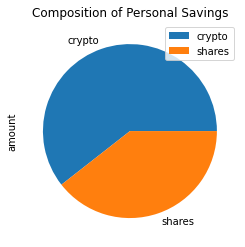

In [12]:
# Plot savings pie chart
# YOUR CODE HERE!
df_savings.plot.pie(y='amount', title='Composition of Personal Savings')

In [13]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
# YOUR CODE HERE!
total_savings = crypto_total_value + shares_total_value

# Validate saving health
# YOUR CODE HERE!
if total_savings > emergency_fund:
    excess= total_savings - emergency_fund
    print(f"Congratulations! You have enough money in this fund, with an excess of ${excess}")
elif total_savings == emergency_fund:
    print("Congratulations! You have reached your goal of having an adequate emergency fund")
elif total_savings < emergency_fund:
    missing= emergency_fund - total_savings
    print(f"Oops! You are short of reaching your emergency fund by ${missing}")

Congratulations! You have enough money in this fund, with an excess of $70515.788


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [23]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-08-17', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2020-08-07', tz='America/New_York').isoformat()

In [44]:
# Get 5 years' worth of historical data for SPY and AGG
# YOUR CODE HERE!
df_stock_data = api.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date,
    limit = 1000
).df
# Display sample data
df_stock_data



AGG                                           \
                             open      high       low    close      volume   
time                                                                         
2016-08-17 00:00:00-04:00  112.45  112.6600  112.3600  112.580   3136737.0   
2016-08-18 00:00:00-04:00  112.64  112.7799  112.5350  112.705   1814107.0   
2016-08-19 00:00:00-04:00  112.53  112.6200  112.3900  112.490   2961016.0   
2016-08-22 00:00:00-04:00  112.66  112.7380  112.5600  112.650   1647564.0   
2016-08-23 00:00:00-04:00  112.78  112.8250  112.6301  112.690   2197732.0   
...                           ...       ...       ...      ...         ...   
2020-08-03 00:00:00-04:00  119.37  119.4000  119.1903  119.400  17837420.0   
2020-08-04 00:00:00-04:00  119.42  119.6300  119.4200  119.630  21512268.0   
2020-08-05 00:00:00-04:00  119.39  119.4900  119.3100  119.400  34175883.0   
2020-08-06 00:00:00-04:00  119.62  119.7300  119.5300  119.580   9009216.0   
2020-08-07 00:00:00-04:00  119.66  119.7300  119.3950  119.445   8830420.0   

                                SPY                                      
                               open    high     low   close      volume  
time                                                                     
2016-08-17 00:00:00-04:00       NaN     NaN     NaN     NaN         NaN  
2016-08-18 00:00:00-04:00  218.3300  218.90  218.21  218.87  42850145.0  
2016-08-19 00:00:00-04:00  218.3100  218.75  217.74  218.57  52238224.0  
2016-08-22 00:00:00-04:00  218.2700  218.80  217.83  218.50  48628907.0  
2016-08-23 00:00:00-04:00  219.2500  219.60  218.90  218.94  41981207.0  
...                             ...     ...     ...     ...         ...  
2020-08-03 00:00:00-04:00  328.3200  329.62  327.73  328.76  71741125.0  
2020-08-04 00:00:00-04:00  327.8600  330.06  327.86  330.03  73684427.0  
2020-08-05 00:00:00-04:00  331.4700  332.39  331.18  332.06  72846458.0  
2020-08-06 00:00:00-04:00  331.4799  334.46  331.13  334.31  76900649.0  
2020-08-07 00:00:00-04:00  333.2800  334.88  332.30  334.55  98710236.0  

[1001 rows x 10 columns]

In [26]:
start_date_2 = pd.Timestamp('2015-08-07', tz='America/New_York').isoformat()
end_date_2 = pd.Timestamp('2016-08-16', tz='America/New_York').isoformat()
df_stock_data_2 = api.get_barset(
    tickers,
    timeframe,
    start=start_date_2,
    end=end_date_2,
    limit=1000
).df
df_stock_data_2

AGG                                         SPY  \
                             open      high      low   close   volume    open   
time                                                                            
2015-08-07 00:00:00-04:00  109.14  109.2750  109.035  109.21  2041167  208.16   
2015-08-10 00:00:00-04:00  109.15  109.1700  108.920  109.06  1149778  209.28   
2015-08-11 00:00:00-04:00  109.42  109.5765  109.284  109.42  1420907  208.98   
2015-08-12 00:00:00-04:00  109.55  109.7100  109.350  109.36  1468979  207.11   
2015-08-13 00:00:00-04:00  109.36  109.3651  109.110  109.15  1465173  208.73   
...                           ...       ...      ...     ...      ...     ...   
2016-08-10 00:00:00-04:00  112.61  112.7300  112.540  112.67  2102720  218.30   
2016-08-11 00:00:00-04:00  112.73  112.7300  112.310  112.37  1600725  218.26   
2016-08-12 00:00:00-04:00  112.72  112.8300  112.630  112.63  1689652  218.29   
2016-08-15 00:00:00-04:00  112.57  112.6175  112.420  112.42  1809714  218.90   
2016-08-16 00:00:00-04:00  112.49  112.5200  112.355  112.40  4192846  218.58   

                                                                 
                               high     low    close     volume  
time                                                             
2015-08-07 00:00:00-04:00  208.3400  206.87  207.930   87669782  
2015-08-10 00:00:00-04:00  210.6700  209.28  210.580   66755890  
2015-08-11 00:00:00-04:00  209.4700  207.76  208.630   88424557  
2015-08-12 00:00:00-04:00  209.1400  205.36  208.890  136171450  
2015-08-13 00:00:00-04:00  209.5500  208.01  208.630   77197796  
...                             ...     ...      ...        ...  
2016-08-10 00:00:00-04:00  218.4038  217.23  217.640   45610104  
2016-08-11 00:00:00-04:00  218.9400  217.95  218.650   48188152  
2016-08-12 00:00:00-04:00  218.7100  217.99  218.450   41815620  
2016-08-15 00:00:00-04:00  219.5000  218.88  219.125   38942460  
2016-08-16 00:00:00-04:00  218.6800  217.96  217.980   46004375  

[259 rows x 10 columns]

In [31]:
combined_stock_df = pd.concat([df_stock_data, df_stock_data_2], axis='rows', join='inner')
combined_stock_df.sort_index()

AGG                                         \
                             open      high       low    close    volume   
time                                                                       
2015-08-07 00:00:00-04:00  109.14  109.2750  109.0350  109.210   2041167   
2015-08-10 00:00:00-04:00  109.15  109.1700  108.9200  109.060   1149778   
2015-08-11 00:00:00-04:00  109.42  109.5765  109.2840  109.420   1420907   
2015-08-12 00:00:00-04:00  109.55  109.7100  109.3500  109.360   1468979   
2015-08-13 00:00:00-04:00  109.36  109.3651  109.1100  109.150   1465173   
...                           ...       ...       ...      ...       ...   
2020-08-03 00:00:00-04:00  119.37  119.4000  119.1903  119.400  24615464   
2020-08-04 00:00:00-04:00  119.42  119.6300  119.4200  119.630  21512268   
2020-08-05 00:00:00-04:00  119.39  119.4900  119.3100  119.400  34239733   
2020-08-06 00:00:00-04:00  119.62  119.7300  119.5300  119.580   9021388   
2020-08-07 00:00:00-04:00  119.66  119.7300  119.3950  119.445   8830420   

                                SPY                                     
                               open    high     low   close     volume  
time                                                                    
2015-08-07 00:00:00-04:00  208.1600  208.34  206.87  207.93   87669782  
2015-08-10 00:00:00-04:00  209.2800  210.67  209.28  210.58   66755890  
2015-08-11 00:00:00-04:00  208.9800  209.47  207.76  208.63   88424557  
2015-08-12 00:00:00-04:00  207.1100  209.14  205.36  208.89  136171450  
2015-08-13 00:00:00-04:00  208.7300  209.55  208.01  208.63   77197796  
...                             ...     ...     ...     ...        ...  
2020-08-03 00:00:00-04:00  328.3200  329.62  327.73  328.76   89861354  
2020-08-04 00:00:00-04:00  327.8600  330.06  327.86  330.03   73684427  
2020-08-05 00:00:00-04:00  331.4700  332.39  331.18  332.06   72941562  
2020-08-06 00:00:00-04:00  331.4799  334.46  331.13  334.31   76988181  
2020-08-07 00:00:00-04:00  333.2800  334.88  332.30  334.55   98710236  

[1259 rows x 10 columns]

In [33]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!
MC_stonk = MCSimulation(
    portfolio_data = combined_stock_df,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*30
)

In [34]:
# Printing the simulation input data
# YOUR CODE HERE!
MC_stonk.portfolio_data.head()

AGG                                        \
                             open      high       low    close   volume   
time                                                                      
2016-08-18 00:00:00-04:00  112.64  112.7799  112.5350  112.705  1814107   
2016-08-19 00:00:00-04:00  112.53  112.6200  112.3900  112.490  2961016   
2016-08-22 00:00:00-04:00  112.66  112.7380  112.5600  112.650  1647564   
2016-08-23 00:00:00-04:00  112.78  112.8250  112.6301  112.690  2197732   
2016-08-24 00:00:00-04:00  112.79  112.8000  112.6290  112.660  2071970   

                                           SPY                          \
                          daily_return    open    high     low   close   
time                                                                     
2016-08-18 00:00:00-04:00          NaN  218.33  218.90  218.21  218.87   
2016-08-19 00:00:00-04:00    -0.001908  218.31  218.75  217.74  218.57   
2016-08-22 00:00:00-04:00     0.001422  218.27  218.80  217.83  218.50   
2016-08-23 00:00:00-04:00     0.000355  219.25  219.60  218.90  218.94   
2016-08-24 00:00:00-04:00    -0.000266  218.82  218.91  217.36  217.88   

                                                  
                             volume daily_return  
time                                              
2016-08-18 00:00:00-04:00  42850145          NaN  
2016-08-19 00:00:00-04:00  52238224    -0.001371  
2016-08-22 00:00:00-04:00  48628907    -0.000320  
2016-08-23 00:00:00-04:00  41981207     0.002014  
2016-08-24 00:00:00-04:00  50310103    -0.004842

In [35]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!
MC_stonk.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.982058,0.999067,0.994435,1.004928,1.005948,1.006402,0.993374,1.010633,1.008120,1.007189,...,0.984564,0.967006,0.988347,1.006943,0.994716,1.002536,0.980501,0.992091,0.999215,0.998021
2,0.983502,0.999756,0.997745,1.018988,0.996956,0.996964,1.002151,1.016049,1.009803,1.006908,...,0.976277,0.981371,0.982669,0.996773,1.006914,1.000513,0.979072,0.991991,1.002672,0.990358
3,0.966728,1.006114,0.990576,1.024920,1.006692,1.005319,1.009230,1.003069,1.004583,0.988564,...,0.973912,0.989311,0.968879,0.985000,0.999357,0.983478,0.991816,0.991878,0.983304,0.976564
4,0.975031,1.009576,0.999562,1.030274,0.989390,0.984787,1.029075,1.016445,1.015572,1.005704,...,0.969481,1.003685,0.991015,0.984433,1.016052,0.977259,0.988572,0.983040,0.978693,0.982759
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,0.354669,0.571273,1.513874,1.291771,0.787028,0.472343,0.903252,1.688438,0.940616,0.584136,...,2.730900,0.605157,0.936786,0.376881,0.544371,1.310403,1.381402,0.855036,1.576260,0.114912
7557,0.353388,0.573975,1.495888,1.272896,0.791726,0.478143,0.901059,1.676932,0.936330,0.588650,...,2.725313,0.600453,0.943287,0.376199,0.544425,1.316792,1.414501,0.859051,1.578530,0.116105
7558,0.354852,0.570372,1.506663,1.262887,0.787910,0.470541,0.892404,1.680262,0.928546,0.595279,...,2.713748,0.590109,0.942882,0.383850,0.538193,1.317410,1.409439,0.875830,1.603346,0.113976
7559,0.350379,0.571055,1.511752,1.283609,0.775950,0.466569,0.906433,1.672308,0.920813,0.594624,...,2.731913,0.591116,0.928829,0.383552,0.543112,1.311372,1.406288,0.869832,1.621125,0.113408


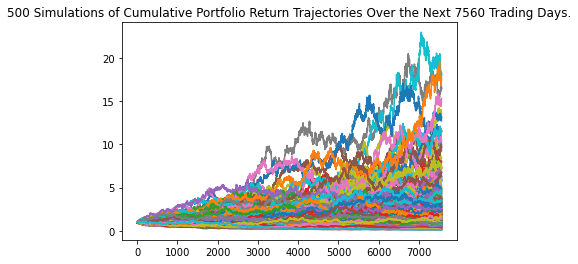

In [36]:
# Plot simulation outcomes
# YOUR CODE HERE!
line_plot = MC_stonk.plot_simulation()

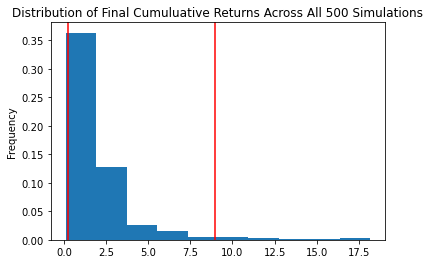

In [37]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!
dist_plot = MC_stonk.plot_distribution()

### Retirement Analysis

In [39]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!
weighted_tbl = MC_stonk.summarize_cumulative_return()
# Print summary statistics
# YOUR CODE HERE!
print(weighted_tbl)

count           500.000000
mean              2.094824
std               2.336670
min               0.112336
25%               0.845169
50%               1.443086
75%               2.411107
max              18.168036
95% CI Lower      0.262719
95% CI Upper      8.939804
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a `$20,000` initial investment.

In [40]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
# YOUR CODE HERE!
ci_lower = round(weighted_tbl[8]*20000,2)
ci_upper = round(weighted_tbl[9]*20000,2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $5254.37 and $178796.08


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [41]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
# YOUR CODE HERE!
ci_lower = round(weighted_tbl[8]*30000,2)
ci_upper = round(weighted_tbl[9]*30000,2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $7881.56 and $268194.13


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [ ]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Plot simulation outcomes
# YOUR CODE HERE!

In [ ]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

In [ ]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

### Ten Years Retirement Option

In [ ]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Plot simulation outcomes
# YOUR CODE HERE!

In [ ]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

In [ ]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")